# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes. (should combine)
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives
5. Marital Status probably has an impact, indicates potential social status and income
6. Too many dependants negatively impacts approval
7. A loan amount that exceeds the applicant income over the loan term, probably influences approval.

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [93]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import plotly.express as px

df = pd.read_csv("../data/loans.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
df.shape

(614, 13)

One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Look at some basic statistics for numerical variables.

In [4]:
numcols = df.select_dtypes(include=['int64','float64']).columns

In [5]:
df[numcols].describe()
# income mean is slightly higher than the median. Distribution is exponential, there are significant outliers bumping up the mean.

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [6]:
catcols = df.select_dtypes(include=['object']).drop('Loan_ID', axis=1).columns

Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

In [7]:
import pprint

for cat in catcols:
    pprint.pprint(df[cat].value_counts())

# most applicants are Male
# most applicants are married
# most applicants are graduates
# very few self-employed
# most applicants are approved
# fairly even counts of property areas - consider grouping Semiurban and Urban
    

Male      489
Female    112
Name: Gender, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
No     500
Yes     82
Name: Self_Employed, dtype: int64
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Y    422
N    192
Name: Loan_Status, dtype: int64


### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



In [8]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


<AxesSubplot:ylabel='Frequency'>

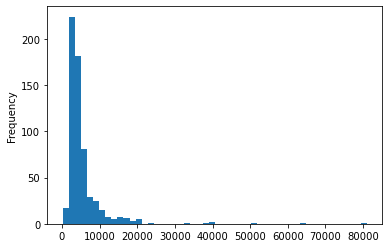

In [9]:
df['ApplicantIncome'].plot.hist(bins=50) # exponential - outliers

<AxesSubplot:ylabel='Frequency'>

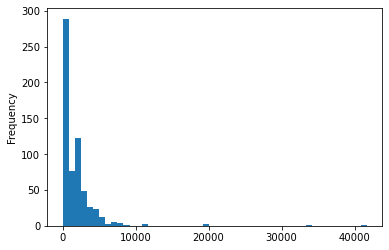

In [10]:
df['CoapplicantIncome'].plot.hist(bins=50) 
# exponential - outliers - a lot of coapplicants with 0 - possibly due to no coapplicant = 0 income for coapplicant


Look at box plots to understand the distributions. 

<AxesSubplot:>

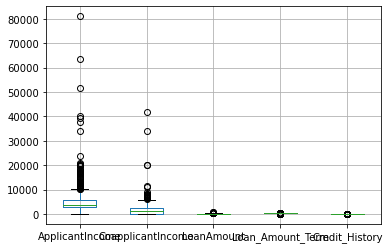

In [11]:
df[numcols].boxplot()

Look at the distribution of income segregated  by `Education`

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

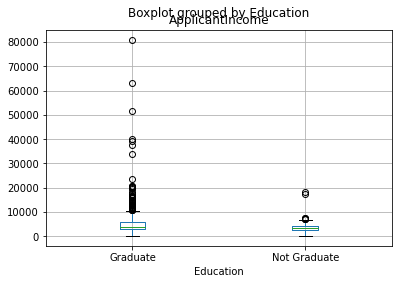

In [12]:
df.boxplot(column='ApplicantIncome', by='Education')

In [97]:
fig = px.box(df, y=['ApplicantIncome'], title='Applicant Income has many Outliers')
fig.show()

Look at the histogram and boxplot of LoanAmount

<AxesSubplot:ylabel='Frequency'>

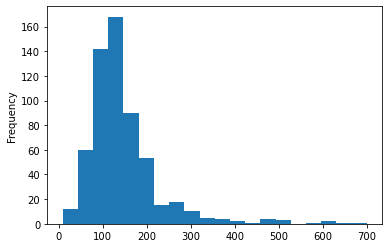

In [13]:
df['LoanAmount'].plot.hist(bins=20)

In [102]:
fig = px.histogram(df, x='LoanAmount', title='Loan Amounts')
fig.show()

<AxesSubplot:>

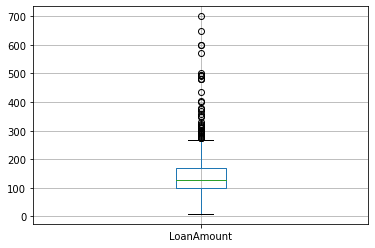

In [14]:
df.boxplot(column='LoanAmount')

<AxesSubplot:title={'center':'LoanAmount'}, xlabel='Loan_Status'>

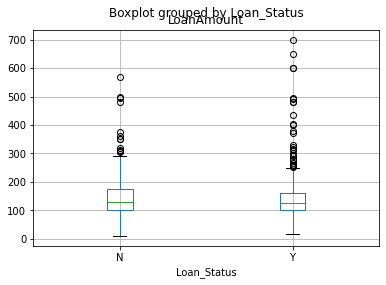

In [15]:
df.boxplot(column='LoanAmount', by='Loan_Status')

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [109]:
education_income = pd.pivot_table(df, index=['Education'], fill_value=0)
fig = px.bar(education_income, y=['ApplicantIncome', 'CoapplicantIncome'],
title='Income and Education')
fig.show()

In [17]:
pd.pivot_table(df, index=['Property_Area'], fill_value=0)

,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount,Loan_Amount_Term
Property_Area,,,,,
Rural,5554.083799,1645.536983,0.830303,152.260116,345.531429
Semiurban,5292.261803,1520.133047,0.861751,145.504386,347.113043
Urban,5398.247525,1716.350495,0.829670,142.198953,332.800000


In [107]:
married_income = pd.pivot_table(df, index=['Married'], fill_value=0)
fig = px.bar(married_income, y=['ApplicantIncome', 'CoapplicantIncome'],
title='Income and Marital Status')
fig.show()

In [19]:
pd.pivot_table(df, index=['Credit_History'], fill_value=0)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
Credit_History,,,,
0.0,5679.438202,1542.179775,146.717647,341.927711
1.0,5426.526316,1528.250358,144.786026,342.192719


In [111]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [122]:
loan_status = pd.pivot_table(df, index=['Loan_Status'], fill_value=0)
fig = px.bar(loan_status, y='Credit_History',
title='Loan Approval Status by Credit History')
fig.show()

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [20]:
# Start libraries for model

import pandas as pd
import numpy as np

import requests
import json


from sklearn.model_selection import train_test_split, GridSearchCV

# libraries for pipeline
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler
from sklearn.feature_selection import SelectKBest
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA


# Models to try
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [21]:
# excluding gender and Loan_ID
# There is an imbalance in genders, it may influence predictions inadvertently, and should have no bearing on approval.
y = df['Loan_Status']
X = df.drop(['Loan_ID', 'Gender', 'Loan_Status'], axis=1)

In [22]:
# split values before the pipeline
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=321)

In [23]:
X['Credit_History'].dtype

dtype('float64')

In [24]:
# split feats, manually since Married isn't an object - 
cat_feats = X_train.dtypes[X_train.dtypes == 'object'].index.to_list()
num_feats = X_train.dtypes[~X_train.dtypes.index.isin(cat_feats)].index.to_list()

In [25]:
num_feats

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [26]:
# function for pipeline - splitting for processing
def numFeat(data):
    return data[num_feats]

def catFeat(data):
    return data[cat_feats]

keep_num = FunctionTransformer(numFeat)
keep_cat = FunctionTransformer(catFeat)

In [27]:
# Function to transform 

def convertString(data):
    string_data = data.astype(str)
    return string_data

string_transformer = FunctionTransformer(convertString)

In [28]:
# log function
def log_transform(data):
    
    return np.log(data)

log_transform_object = FunctionTransformer(log_transform)

In [29]:
# Make total income

def totalIncome(X):
    applicant_income = X['ApplicantIncome']
    coapp_income = X['CoapplicantIncome']
    X = X.copy()
    X['total_income'] = applicant_income + coapp_income
    return X

total_income_transformer = FunctionTransformer(totalIncome)

In [30]:
# drop old incomes
def dropIncome(X):
    return X.drop(['ApplicantIncome', 'CoapplicantIncome'], axis=1)

drop_income_transformer = FunctionTransformer(dropIncome)

In [31]:
class applyLog():
    def __init__(self, log_col):
        self.log_col = log_col

    def fit(self, X, y = None):
        return self

    def transform(self, X, y = None):
    
        X = X.copy()
        X[self.log_col] = np.log(X[self.log_col] + 1)

        return X

In [32]:
# define cleaning Pipeline
cleaning = Pipeline([
    # add incomes into one feature
    ('total_income', total_income_transformer),
    # # remove unused income features
    ('drop_old_income', drop_income_transformer),
    ])

In [33]:
# Also remove from feats list
for element in ['CoapplicantIncome', 'ApplicantIncome']:
    num_feats.remove(element)
num_feats.append('total_income')

In [34]:
# Feature Engineering Pipelines

num_transform = Pipeline([
    ('num_fillna_median', SimpleImputer(strategy='median')),
    ('scaling', StandardScaler()),
    ('select_best', SelectKBest(k=3)),
    ])

cat_transform = Pipeline([
    ('cat_fillna_median', SimpleImputer(strategy='most_frequent')),
    ('string_transformer', string_transformer),
    ('one_hot', OneHotEncoder(sparse=False)),
    ('pca', PCA(n_components=3)),
    ])

In [35]:
preprocessing = ColumnTransformer([
    ('num_transform', num_transform, num_feats),
    ('cat_transform', cat_transform, cat_feats)
    ], remainder='drop')

In [36]:
num_feats

['LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'total_income']

In [37]:
# Make final pipeline

pipeline = Pipeline([
    ('cleaning', cleaning),
    ('log_income', applyLog(log_col='total_income')),
    ('log_loan_amount', applyLog(log_col='LoanAmount')),
    ('preprocessing', preprocessing),
    ('classifier', LogisticRegression())
    ])

In [38]:
model = pipeline.fit(X_train, y_train)

In [39]:
model

Pipeline(steps=[('cleaning',
                 Pipeline(steps=[('total_income',
                                  FunctionTransformer(func=<function totalIncome at 0x7f8b371ce040>)),
                                 ('drop_old_income',
                                  FunctionTransformer(func=<function dropIncome at 0x7f8b371ce0d0>))])),
                ('log_income', <__main__.applyLog object at 0x7f8b371ad6d0>),
                ('log_loan_amount',
                 <__main__.applyLog object at 0x7f8b371ad880>),
                ('preprocessing',
                 Col...
                                                 ('cat_transform',
                                                  Pipeline(steps=[('cat_fillna_median',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('string_transformer',
                                                                   FunctionTransformer(func=<function convertString at 0x7f8b371afee0>)),
                                                                  ('one_hot',
                                                                   OneHotEncoder(sparse=False)),
                                                                  ('pca',
                                                                   PCA(n_components=3))]),
                                                  ['Married', 'Dependents',
                                                   'Education', 'Self_Employed',
                                                   'Property_Area'])])),
                ('classifier', LogisticRegression())])

In [87]:
# param_grid = {
#     'classifier': [SVC(), RidgeClassifier(), LogisticRegression(), RandomForestClassifier()],
#     'preprocessing__num_transform__scaling': [StandardScaler(), MinMaxScaler(), RobustScaler(), MaxAbsScaler()],
#     'preprocessing__cat_transform__pca__n_components': [3,5],
#     'preprocessing__num_transform__select_best__k': [1,3]
# }

# try different scaler 

param_grid = {
    'classifier': [SVC()],
    'classifier__C': [0.5, 1],
    'classifier__kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
    'preprocessing__num_transform__scaling': [StandardScaler()],
    'preprocessing__cat_transform__pca__n_components': [2,3],
    'preprocessing__num_transform__select_best__k': [1,2]
}

In [88]:
grid = GridSearchCV(pipeline, param_grid=param_grid, cv=5, n_jobs=-1)


In [89]:
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
best_hyperparams = grid.best_params_
best_acc = grid.score(X_test, y_test)
print(f'Best test set accuracy: {best_acc}\nAchieved with hyperparameters: {best_hyperparams}')

Best test set accuracy: 0.8617886178861789
Achieved with hyperparameters: {'classifier': SVC(C=0.5, kernel='linear'), 'classifier__C': 0.5, 'classifier__kernel': 'linear', 'preprocessing__cat_transform__pca__n_components': 2, 'preprocessing__num_transform__scaling': StandardScaler(), 'preprocessing__num_transform__select_best__k': 1}


/Users/niclapenna/opt/anaconda3/envs/lhl_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/niclapenna/opt/anaconda3/envs/lhl_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/niclapenna/opt/anaconda3/envs/lhl_env/lib/python3.8/site-packages/sklearn/pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/niclapenna/opt/anaconda3/envs/lhl_env/lib/python3.8/si

In [83]:
grid.best_params_

{'classifier': SVC(C=0.5),
 'classifier__C': 0.5,
 'preprocessing__cat_transform__pca__n_components': 2,
 'preprocessing__num_transform__scaling': StandardScaler(),
 'preprocessing__num_transform__select_best__k': 1}

In [44]:
# # Engineering Features

# num_transform = Pipeline([
#     ('scaling', StandardScaler()),
#     ('select_best', SelectKBest(k=3))
# ])

# cat_transform = Pipeline([
#     ('one_hot', OneHotEncoder()),
#     ('pca', PCA(n_components=3))
# ])

In [45]:
# # Apply Feature transformations to specific columns
# preprocessing = ColumnTransformer([
#     # ()
#     ('log_transformer', log_transform_object, ['LoanAmount', 'TotalIncome']),
#     ('num_transform', num_transform, num_feats),
#     ('cat_transform', cat_transform, cat_feats),
#     ])

In [46]:
# pipeline = Pipeline([
#     ('preprocessing', preprocessing),
#     ('classifier', LogisticRegression())
#     ])

### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

Combine both incomes as total income and take a log transformation of the same.

In [47]:
def loan_feat(data):
    return data['LoanAmount']

In [48]:
loan_amount = loan_feat(X)

<AxesSubplot:ylabel='Frequency'>

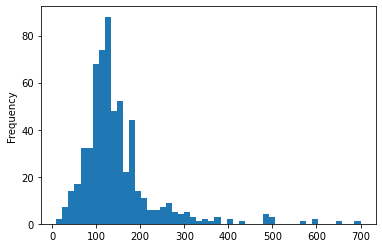

In [49]:
loan_amount.plot.hist(bins=50)

<AxesSubplot:ylabel='Frequency'>

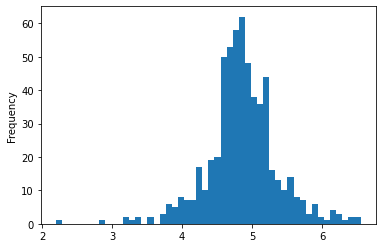

In [50]:
log_loan_amount = log_transform(loan_amount)

log_loan_amount.plot.hist(bins=50)

In [51]:
def combined_income(data):
    return data['ApplicantIncome'] + data['CoapplicantIncome']

<AxesSubplot:ylabel='Frequency'>

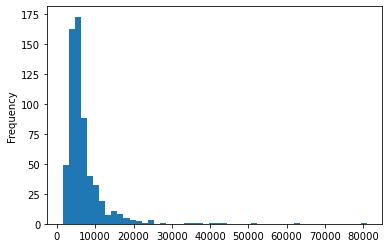

In [52]:
income = combined_income(X)

income.plot.hist(bins=50)

<AxesSubplot:ylabel='Frequency'>

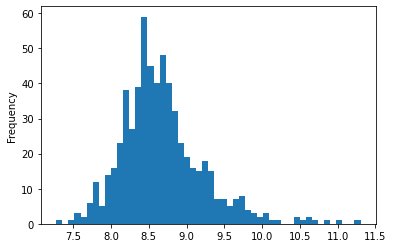

In [53]:
log_income = log_transform(income)

log_income.plot.hist(bins=50)

## 4. Building a Predictive Model

In [54]:
# see above

Try paramater grid search to improve the results

## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

In [55]:
# see above

## 6. Deploy your model to cloud and test it with PostMan, BASH or Python

In [67]:
# pickling
import pickle

filename = '../src/loans_approval_model.sav'
pickle.dump(grid.best_estimator_, open(filename, 'wb'))

In [57]:
# test the saved model

loaded_model = pickle.load(open(filename, 'rb'))

In [58]:
result = loaded_model.score(X_test, y_test)

In [59]:
print(result)

0.8617886178861789


In [60]:
# define test data
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Married            611 non-null    object 
 1   Dependents         599 non-null    object 
 2   Education          614 non-null    object 
 3   Self_Employed      582 non-null    object 
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         592 non-null    float64
 7   Loan_Amount_Term   600 non-null    float64
 8   Credit_History     564 non-null    float64
 9   Property_Area      614 non-null    object 
dtypes: float64(4), int64(1), object(5)
memory usage: 48.1+ KB


In [61]:
X.iloc[1]

Married                   Yes
Dependents                  1
Education            Graduate
Self_Employed              No
ApplicantIncome          4583
CoapplicantIncome      1508.0
LoanAmount              128.0
Loan_Amount_Term        360.0
Credit_History            1.0
Property_Area           Rural
Name: 1, dtype: object

In [132]:
json_data = {
    'Married': 'Yes',
    'Dependents': '1',
    'Education': 'Graduate',
    'Self_Employed': 'No',
    'ApplicantIncome': 4583.0,
    'CoapplicantIncome': 1508.0,
    'LoanAmount': 128.0,
    'Loan_Amount_Term': 360.0,
    'Credit_History': 1.0,
    'Property_Area': 'Rural'
}

In [133]:
# test the api locally
import pprint
url = 'http://10.0.0.125:5050/loans'

response = requests.post(url=url, json=json_data)

pprint.pprint(response.json())

['Y']


In [134]:

# test the connection on server
url = 'http://54.85.201.33:5050/loans'

response = requests.post(url=url, json=json_data)

pprint.pprint(response.json())

['Y']
